<a href="https://colab.research.google.com/github/NewKanvas/Projeto-5/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Questionamentos:**

1. Como se comportaram os valores para todas as criptomoedas?   
   Os valores tiveram uma tendência de queda ou de aumento?

2. Quais os valores médios para todas as criptomoedas?

3. Em quais anos houve maiores quedas e valorizações?

4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

7. Existe correlação entre os valores para todas as criptomoedas?


# **Importando as bibliotecas**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt # pip install matplotlib
# import plotly.express as px #  pip install --upgrade plotly





# **Carregando e Tratando Dados**

In [42]:
# Lendo os datasets
aave = pd.read_csv('https://raw.githubusercontent.com/NewKanvas/Projeto-5/main/Data/coin_Aave.csv')
binance_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_BinanceCoin.csv')
bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Bitcoin.csv')
cardano = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cardano.csv')
chainlink = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_ChainLink.csv')
cosmos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cosmos.csv')
crypto_com_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_CryptocomCoin.csv')
dogecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Dogecoin.csv')
eos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_EOS.csv')
ethereum = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Ethereum.csv')
iota = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Iota.csv')
litecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Litecoin.csv')
monero = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Monero.csv')
nem = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_NEM.csv')
polkadot = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Polkadot.csv')
solana = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Solana.csv')
stellar = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Stellar.csv')
tether = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tether.csv')
tron = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tron.csv')
uniswap = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Uniswap.csv')
usdcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_USDCoin.csv')
wrapped_bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_WrappedBitcoin.csv')
xrp = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_XRP.csv')


In [43]:
# Concatenando Datasets
cripto = pd.concat([aave, binance_coin, bitcoin, cardano, chainlink, cosmos, crypto_com_coin, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, uniswap, usdcoin, wrapped_bitcoin, xrp], ignore_index=True)
cripto['Date'] = pd.to_datetime(cripto['Date']).dt.date #Convertendo para conter somente a Data
del cripto['SNo'] # Removendo a coluna Sno
del cripto['Symbol'] # Removendo a coluna Symbol

traducao = {"Name": "Moeda",
             "Date": "Data",
               "High": "Alta",
                 "Low": "Baixa",
                   "Open": "Abertura",
                     "Close": "Fechamento",
                       "Volume": "Volume",
                         "Marketcap": "Marketcap",}

cripto.rename(columns=traducao, inplace=True)

In [44]:
cripto.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

### Testando

In [45]:
cripto # Definir oque é o valor real, seria a media do valor mais alto e baixo? o valor no qual ela terminou?

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
37077,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [46]:
'''
criptoTest = cripto.groupby(['Name','Date'])[['High','Low']].first()
criptoTest['Mean'] = (criptoTest['High'] + criptoTest['Low']) / 2
criptoTest.reset_index(inplace=True)
del criptoTest['High']
del criptoTest['Low']
criptoTest = criptoTest.set_index(['Name', 'Date']).unstack(level=0)
criptoTest
'''

"\ncriptoTest = cripto.groupby(['Name','Date'])[['High','Low']].first()\ncriptoTest['Mean'] = (criptoTest['High'] + criptoTest['Low']) / 2\ncriptoTest.reset_index(inplace=True)\ndel criptoTest['High']\ndel criptoTest['Low']\ncriptoTest = criptoTest.set_index(['Name', 'Date']).unstack(level=0)\ncriptoTest\n"

In [47]:
criptoTest = cripto.groupby(['Moeda','Data'])[['Fechamento']].first()
criptoTest.reset_index(inplace=True)
criptoTest = criptoTest.set_index(['Moeda', 'Data']).unstack(level=0)
criptoTest = criptoTest['Fechamento']
criptoTest

Moeda,Aave,Binance Coin,Bitcoin,Cardano,Chainlink,Cosmos,Crypto.com Coin,Dogecoin,EOS,Ethereum,...,NEM,Polkadot,Solana,Stellar,TRON,Tether,USD Coin,Uniswap,Wrapped Bitcoin,XRP
Data,,,,,,,,,,,,,,,,,,,,,
2013-04-29,NaN,NaN,144.539993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,116.989998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,105.209999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,97.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,233.948437,287.423094,33897.048590,1.394397,18.283561,11.764925,0.113914,0.245264,3.934325,2150.040364,...,0.131455,15.340774,34.020482,0.263427,0.066512,1.000033,1.000035,18.241726,33824.263339,0.656763
2021-07-03,259.655225,298.237117,34668.548402,1.406836,18.538818,11.817927,0.118407,0.246411,4.046421,2226.114282,...,0.134756,15.553716,34.478816,0.264324,0.066813,0.999956,0.999984,19.524757,34676.985915,0.672888
2021-07-04,277.038792,307.732096,35287.779766,1.458184,19.262838,12.263548,0.122427,0.246483,4.059930,2321.724112,...,0.137617,16.014026,34.310601,0.268128,0.067298,0.999501,0.999500,20.771874,35289.762931,0.694945


In [60]:
criptoTest.mean().sort_values(ascending=False)

'''
Bitcoin             6700.146240
Ethereum             382.879899
Aave                 254.506688
Monero                74.069198
Binance Coin          52.028231
Litecoin              49.247365
Polkadot              18.107145
Uniswap               17.014778
Solana                10.400225
Cosmos                 6.759896
'''

Moeda
Wrapped Bitcoin    17052.665626
Bitcoin             6700.146240
Ethereum             382.879899
Aave                 254.506688
Monero                74.069198
Binance Coin          52.028231
Litecoin              49.247365
Polkadot              18.107145
Uniswap               17.014778
Solana                10.400225
Cosmos                 6.759896
Chainlink              6.294481
EOS                    4.623294
USD Coin               1.003767
Tether                 1.000656
IOTA                   0.729461
Cardano                0.255287
XRP                    0.234548
NEM                    0.124703
Stellar                0.101413
Crypto.com Coin        0.081802
TRON                   0.032553
Dogecoin               0.013669
dtype: float64

Text(0.5, 1.0, 'Valor Médio Diário das Criptomoedas')

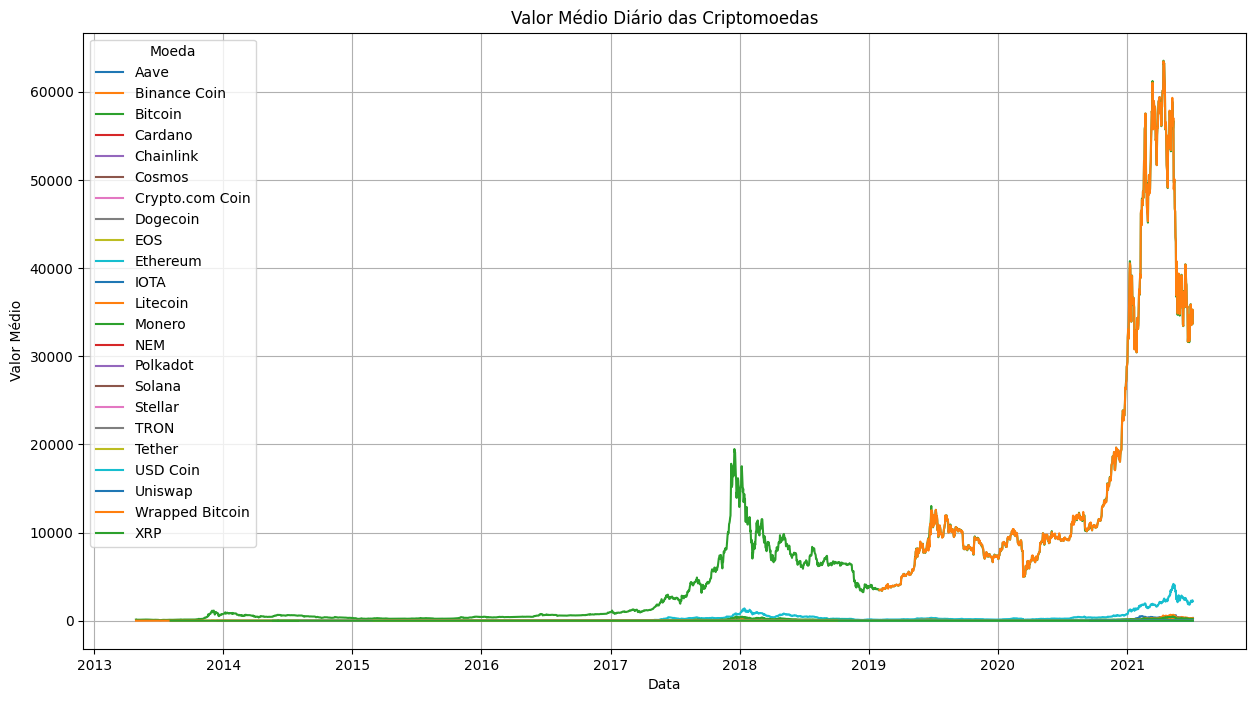

In [54]:
#Filtra para 5 que tem as medias mais altas.

criptoTest.plot(grid = True, figsize=(15,8)) # Melhorar o grafico para ficar mais visivel as outras moedas
# comentar os pontos mais altos, picos

plt.xlabel('Data')
plt.ylabel('Valor Médio')
plt.title('Valor Médio Diário das Criptomoedas')

Text(0.5, 1.0, 'Valor Médio Diário das Criptomoedas')

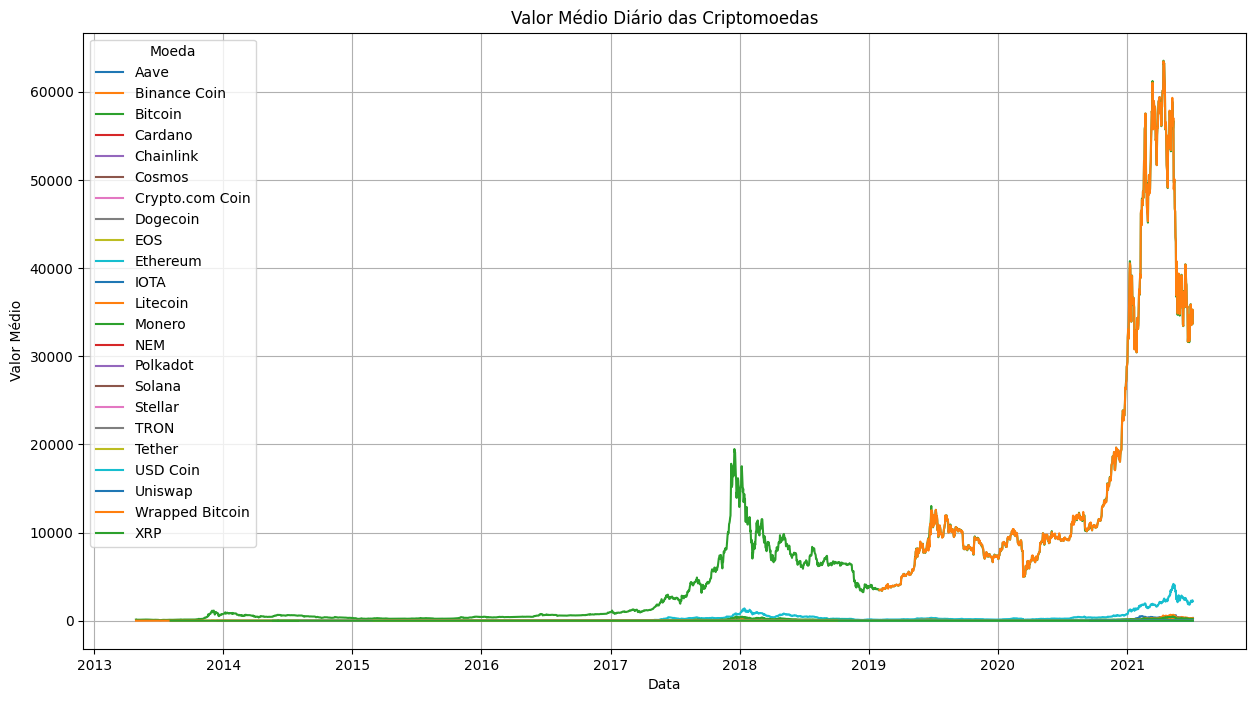

In [49]:
criptoTest = cripto.groupby(['Moeda','Data'])[['Abertura']].first()
criptoTest.reset_index(inplace=True)
criptoTest = criptoTest.set_index(['Moeda', 'Data']).unstack(level=0)
criptoTest = criptoTest['Abertura']
criptoTest

criptoTest.plot(grid = True, figsize=(15,8)) # Melhorar o grafico para ficar mais visivel as outras moedas
# comentar os pontos mais altos, picos

plt.xlabel('Data')
plt.ylabel('Valor Médio')
plt.title('Valor Médio Diário das Criptomoedas')